In [180]:
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import pandas as pd
import numpy as np

In [181]:
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

In [193]:
algs = ['sgd', 'nam', 'rmm', 'dam', 'idam']
# algs = ['SGD', 'RMM', 'iDAM+', 'DAM+', 'NAM']
lines = ["solid","dotted","dashed","solid", "dashdot"]

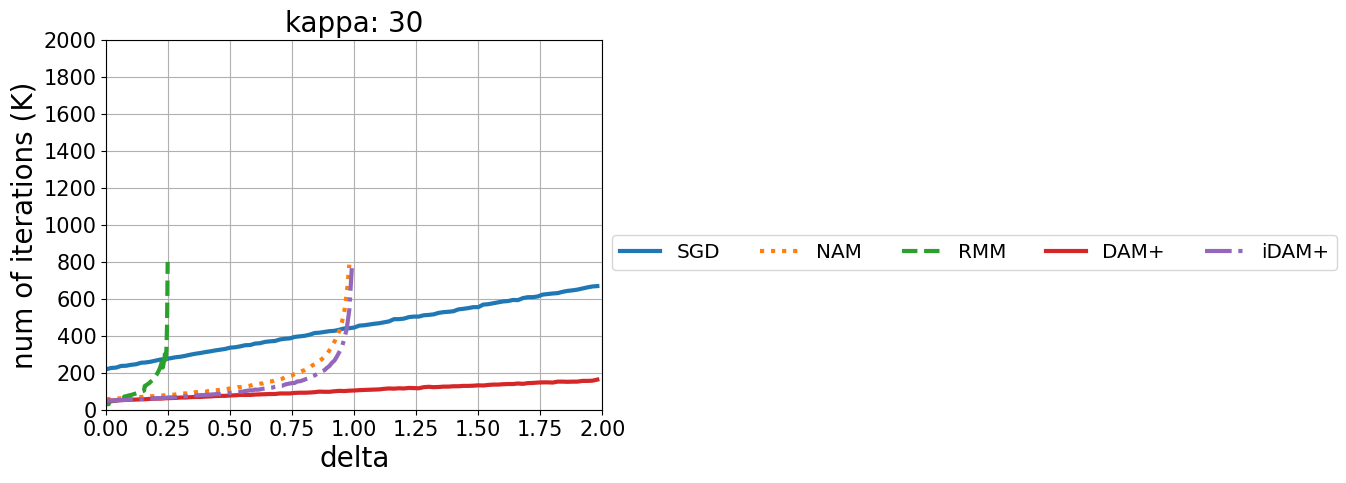

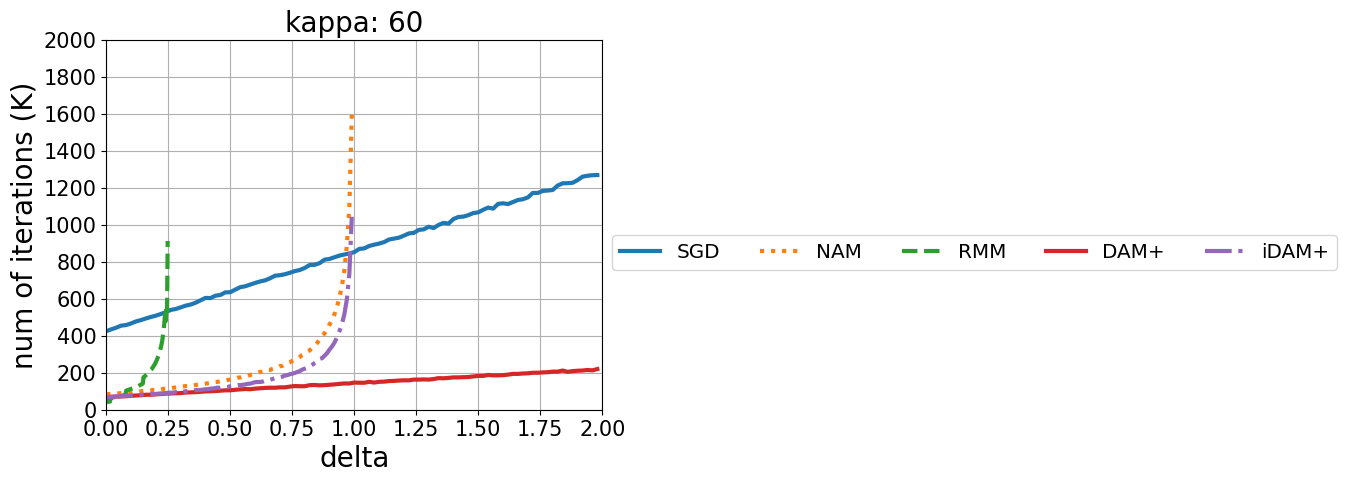

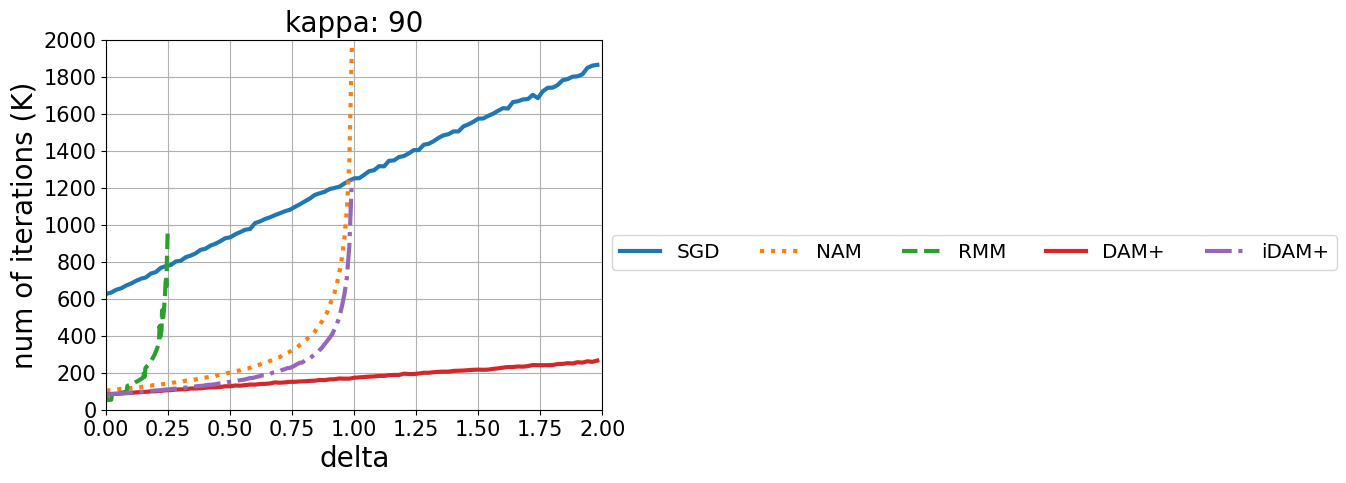

In [202]:
for L in [30, 60, 90]:
    fig = plt.figure()
    ax = fig.gca()
    for alg, line in zip(algs, lines):
        root = alg+f'/L_{L}'
        latest_folder =sorted(os.listdir(root))[-1]
        df = pd.read_csv(root+"/"+latest_folder+"/"+alg+".csv")
        plt.plot(df.delta, df.num_iters, label=alg, linewidth=3, linestyle=line)
        plt.xlabel(r'delta', fontsize = 20)
        plt.ylabel("num of iterations (K)", fontsize = 20)
        plt.xlim(0,2)
        plt.ylim(0,801)
        plt.title(f"kappa: {L}", fontsize = 20)
        plt.legend(['SGD', 'NAM', 'RMM', 'DAM+', 'iDAM+'], ncol=5, bbox_to_anchor=(1, 0.5), fontsize="x-large")
    ax.set_yticks(np.linspace(0, 2000, 11))
    ax.set_xticks(np.arange(0, 2.01, 0.25))
    plt.grid()
    plt.savefig(f"L_{L}.png", bbox_inches='tight')
    plt.show()

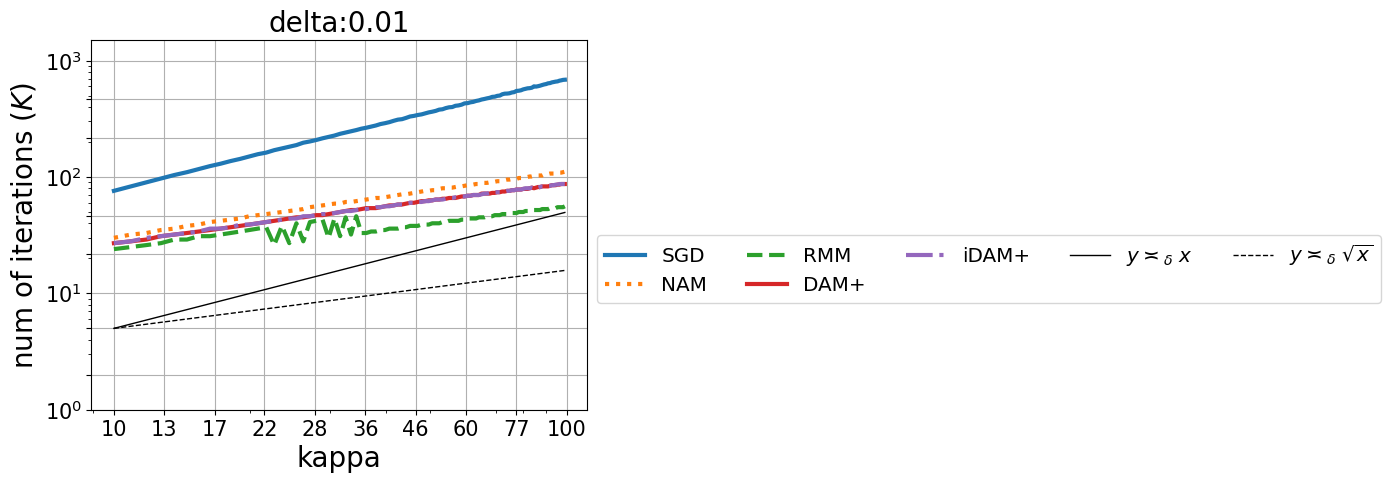

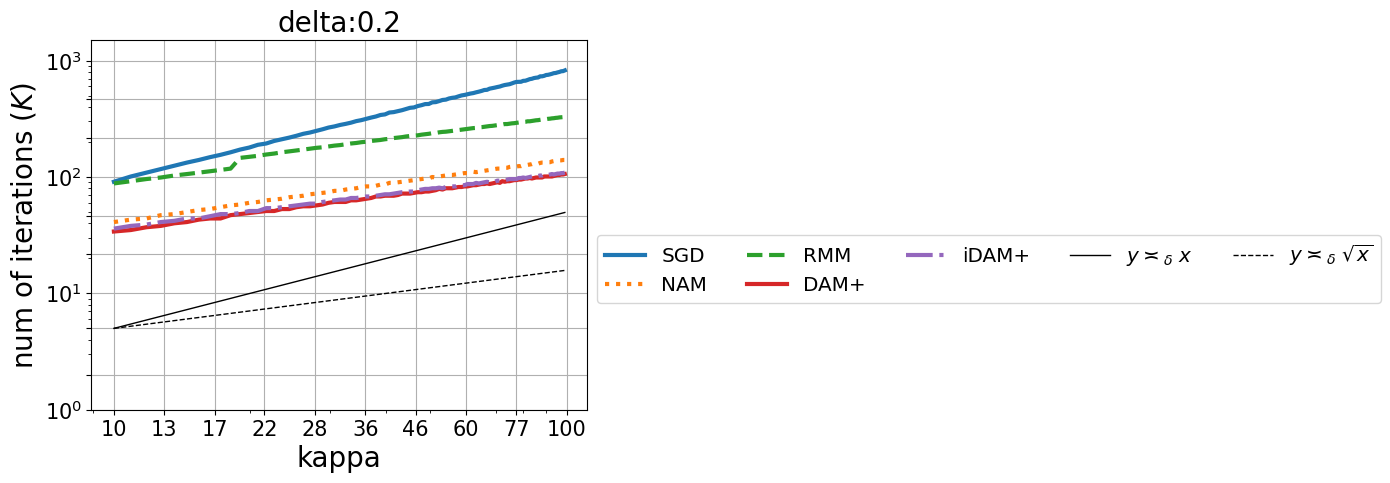

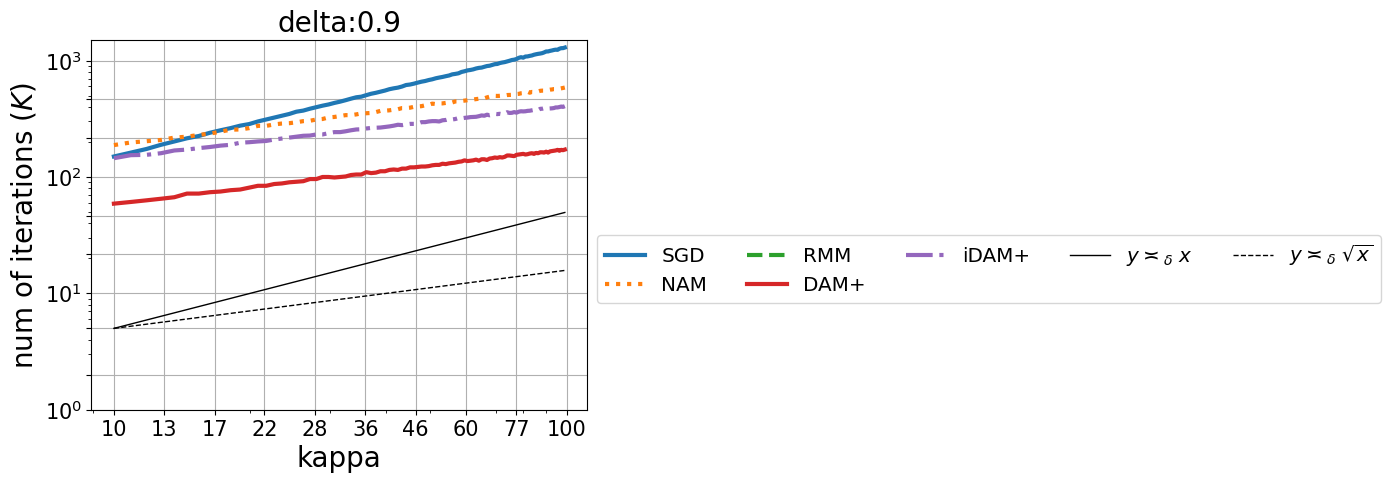

In [203]:
for delta in [0.01, 0.2, 0.9]:
    fig = plt.figure()
    ax = fig.gca()
    for alg, line in zip(algs, lines):
        root = alg+f'/delta_{delta}'
        latest_folder =sorted(os.listdir(root))[-1]
        df = pd.read_csv(root+"/"+latest_folder+"/"+alg+".csv")
        plt.loglog(df.L, df.num_iters, label=alg,linewidth=3, linestyle=line)
        plt.xlabel("kappa", fontsize = 20)
        plt.ylabel("num of iterations ($K$)", fontsize = 20)
        plt.title(f"delta:{delta}", fontsize = 20)
    plt.loglog(df.L, df.L*0.5, label="y=0.5*x",linewidth=1, color="black")
    plt.loglog(df.L, np.sqrt(df.L*2.5), label="$y \asymp \sqrt{x}$",linewidth=1, color="black", linestyle="dashed")
    # plt.xlim(10,100)
    plt.ylim(1,1500)
    ax.set_yticks([float(np.format_float_positional(x, precision=0)) for x in np.logspace(0, 3, 10)])
    ax.set_xticks([float(np.format_float_positional(x, precision=1)) for x in np.logspace(1, 2, 10)])
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    plt.legend(["SGD", "NAM", "RMM", "DAM+", "iDAM+"]+[r"$y \asymp_{\delta} \ x$", r"$y \asymp_{\delta} \ \sqrt{x}$"], ncol=5, bbox_to_anchor=(1, 0.5), fontsize="x-large")
    # ax.set_yticks(np.arange(0, 801, 100))
    plt.grid()
    plt.savefig(f"delta_{delta}.png", bbox_inches='tight')
    plt.show()